# kaggle-bike-demand-prediction

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [71]:
# Execute this to save new versions of the notebook
jovian.commit(project="kaggle-bike-demand-prediction")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "syedalauddin-b/kaggle-bike-demand-prediction" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/syedalauddin-b/kaggle-bike-demand-prediction


'https://jovian.ai/syedalauddin-b/kaggle-bike-demand-prediction'

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math

In [5]:
#Step - 1 Read the data 
bikes=pd.read_csv('hour (1).csv')

In [6]:
bikes.shape

(17379, 17)

In [7]:
bikes

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
#Step 2 - Prelim Analysis and Feature selection
bikes_prep=bikes.copy()
bikes_prep=bikes_prep.drop(['index', 'date','casual', 'registered'],axis=1)

In [9]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [10]:
#Basis Analysis 
#Missing valaus
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

/tmp/ipykernel_36/262426917.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  bikes_prep.hist(rwidth=0.9,ax=ax)


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'demand'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

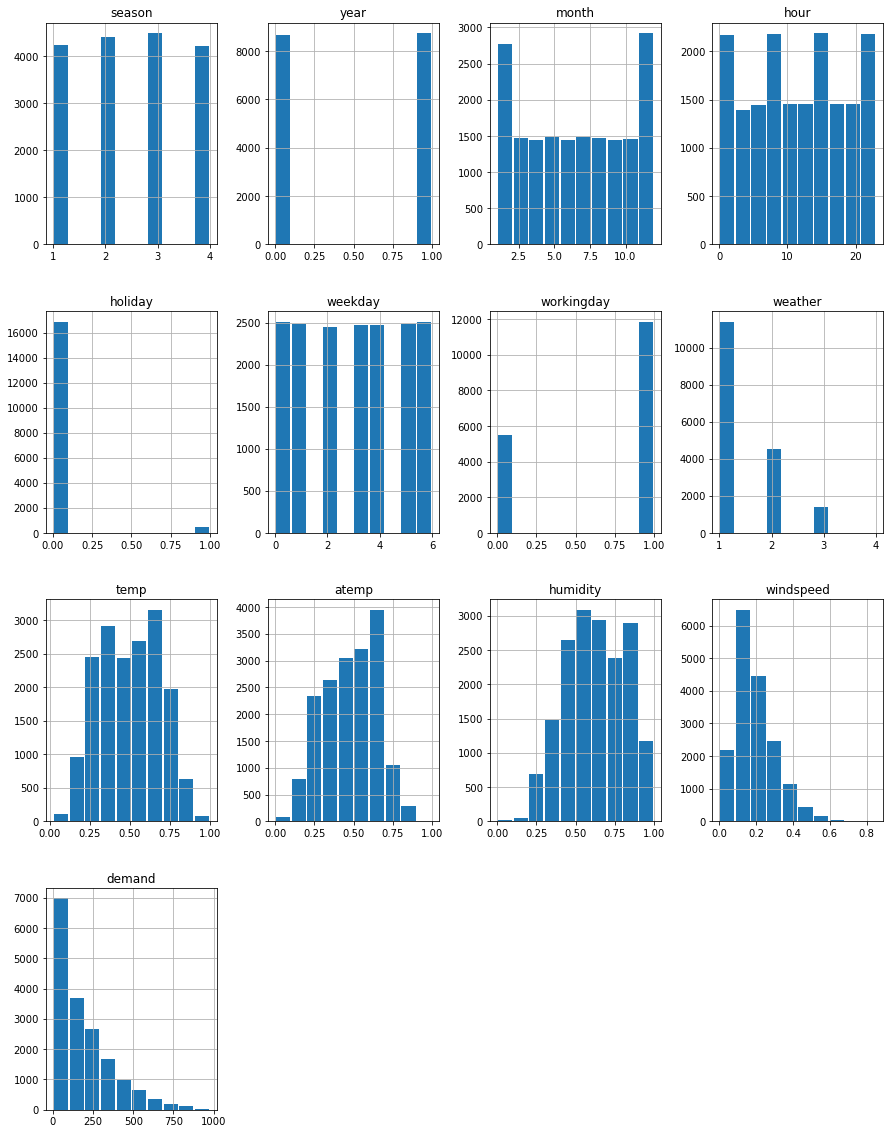

In [11]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca() 
 
bikes_prep.hist(rwidth=0.9,ax=ax)


<Figure size 432x288 with 0 Axes>

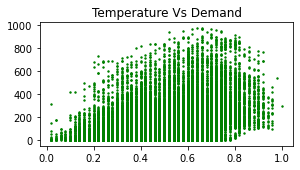

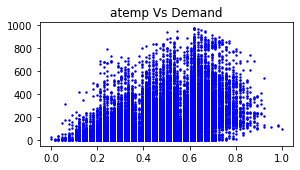

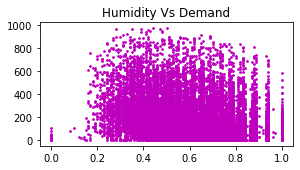

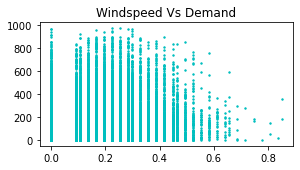

In [12]:
#step3 -Data Visualization 
#visualise the continous features vs demand 

plt.tight_layout()
plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep["temp"],bikes_prep['demand'],s=2,c='g')

plt.figure(figsize = (10,5))
plt.subplot(2,2,2)
plt.title('atemp Vs Demand')
plt.scatter(bikes_prep["atemp"],bikes_prep['demand'],s=2,c='b')


plt.figure(figsize = (10,5))
plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep["humidity"],bikes_prep['demand'],s=3,c='m')

plt.figure(figsize = (10,5))
plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep["windspeed"],bikes_prep['demand'],s=2,c='c')

<BarContainer object of 4 artists>

<Figure size 432x288 with 0 Axes>

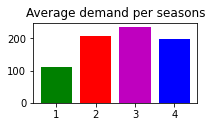

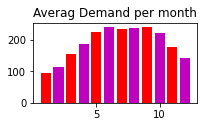

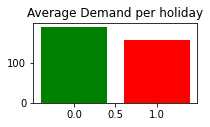

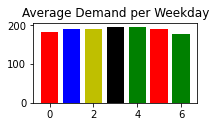

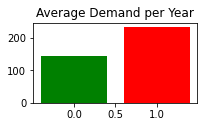

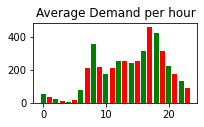

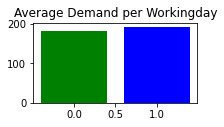

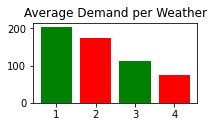

In [13]:
plt.tight_layout()
plt.figure(figsize = (10,5))
#plot the categorical features vs demand 
#crearte the subplot 
plt.subplot(3,3,1)
plt.title('Average demand per seasons')
#create unique season's values
cat_list=bikes_prep['season'].unique() 
#Create average demand per season using grouby 
cat_average=bikes_prep.groupby('season')['demand'].mean()
colours=['g','r','m','b']
plt.bar(cat_list,cat_average,color=colours )
plt.figure(figsize = (10,5))

plt.subplot(3,3,2)
plt.title('Averag Demand per month')
cat_list=bikes_prep["month"].unique()
cat_average=bikes_prep.groupby('month')["demand"].mean()
plt.bar(cat_list,cat_average,color=["r",'m'])

plt.figure(figsize = (10,5))
plt.subplot(3,3,3)
plt.title("Average Demand per holiday")
cat_list=bikes_prep["holiday"].unique()
cat_average=bikes_prep.groupby('holiday')['demand'].mean()
plt.bar(cat_list,cat_average,color=['g','r'])

plt.figure(figsize = (10,5))
plt.subplot(3,3,4)
plt.title("Average Demand per Weekday")
cat_list=bikes_prep["weekday"].unique()
cat_average=bikes_prep.groupby('weekday')['demand'].mean()
plt.bar(cat_list,cat_average,color=['g','r','b','y','k'])

plt.figure(figsize = (10,5))
plt.subplot(3,3,5)
plt.title("Average Demand per Year")
cat_list=bikes_prep["year"].unique()
cat_average=bikes_prep.groupby('year')['demand'].mean()
plt.bar(cat_list,cat_average,color=['g','r'])

plt.figure(figsize = (10,5))
plt.subplot(3,3,6)
plt.title("Average Demand per hour")
cat_list=bikes_prep["hour"].unique()
cat_average=bikes_prep.groupby('hour')['demand'].mean()
plt.bar(cat_list,cat_average,color=['g','r'])

plt.figure(figsize = (10,5))
plt.subplot(3,3,7)
plt.title("Average Demand per Workingday")
cat_list=bikes_prep["workingday"].unique()
cat_average=bikes_prep.groupby('workingday')['demand'].mean()
plt.bar(cat_list,cat_average,color=['g','b'])

plt.figure(figsize = (10,5))
plt.subplot(3,3,8)
plt.title("Average Demand per Weather")
cat_list=bikes_prep["weather"].unique()
cat_average=bikes_prep.groupby('weather')['demand'].mean()
plt.bar(cat_list,cat_average,color=['g','r',]) 

#Need to adjust the plots

# Check for outliers 

In [14]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [15]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

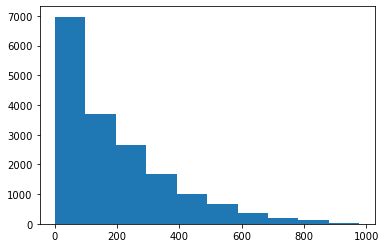

In [16]:
plt.hist(bikes_prep['demand'])

  # Step -4 Check multiple Linear Regression Assumption 

In [17]:
#Linearity using correlation coefficient matrix using corr 
correlation = bikes_prep[['temp','atemp','humidity','windspeed','demand',]].corr()

In [18]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [19]:
bikes_prep=bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'],axis=1)  

In [20]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474717, 0.4704956 , 0.49622816, 0.49404055, 0.46795937,
        0.47732046, 0.5267577 , 0.5914575 , 0.6520158 , 0.71519554,
        0.8059103 , 0.9253097 , 1.        , 0.9253097 , 0.8059103 ,
        0.71519554, 0.6520158 , 0.5914575 , 0.5267577 , 0.47732046,
        0.46795937, 0.49404055, 0.49622816, 0.4704956 , 0.45474717],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f7691ef48e0>)

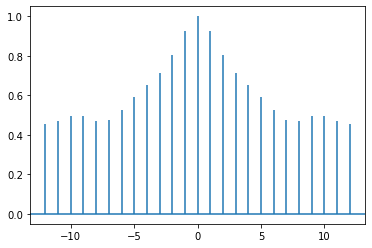

In [21]:
# checking auto correlation and the value should be in float not integer to check the auto correlation
df1=pd.to_numeric(bikes_prep['demand'],downcast='float')


plt.acorr(df1,maxlags=12)





#  Solving Normality of demand

<AxesSubplot:>

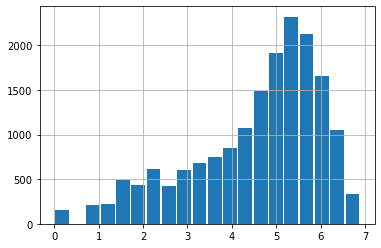

In [22]:
df1=bikes_prep['demand']
df2=np.log(df1)
df2.hist(rwidth=0.9,bins=20)

In [23]:
#Now actual tronsformation 
bikes_prep['demand']=np.log(bikes_prep['demand'])

In [24]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123
17375,1,12,20,0,2,0.26,0.60,4.488636
17376,1,12,21,0,1,0.26,0.60,4.499810
17377,1,12,22,0,1,0.26,0.56,4.110874


# Solving the problem of Auto Assumptions


In [25]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123
17375,1,12,20,0,2,0.26,0.60,4.488636
17376,1,12,21,0,1,0.26,0.60,4.499810
17377,1,12,22,0,1,0.26,0.56,4.110874


In [28]:
#Autocorrelation in the demand column
t_1=bikes_prep['demand'].shift(+1).to_frame()
t_1.columns=["t-1"]

t_2=bikes_prep['demand'].shift(+2).to_frameme()
t_2.columns=["t-2"]

t_3=bikes_prep["demand"].shift(+3).to_frame()
t_3.columns=['t-3']
bikes_prep_lag=pd.concat([bikes_prep,t_1, t_2 ,t_3],axis=1)

In [30]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [31]:
bikes_prep_lag=bikes_prep_lag.dropna()

In [33]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


# Step-7 Create Dummy variables and drop first to avoid dummy variable trap using get dummies

In [34]:
#Seasons,Holiday,Weather,month,hours

In [35]:
dummy_df=pd.get_dummies(bikes_prep_lag,drop_first=True)

In [42]:
#to dummy variable to work data type should be categary

bikes_prep_lag.dtypes

bikes_prep_lag["season"]=bikes_prep_lag["season"].astype('category')
bikes_prep_lag["holiday"]=bikes_prep_lag["holiday"].astype('category')
bikes_prep_lag["weather"]=bikes_prep_lag["weather"].astype('category')
bikes_prep_lag["month"]=bikes_prep_lag["month"].astype('category')
bikes_prep_lag["hour"]=bikes_prep_lag["hour"].astype('category')

/tmp/ipykernel_36/3934944481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag["season"]=bikes_prep_lag["season"].astype('category')
/tmp/ipykernel_36/3934944481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag["holiday"]=bikes_prep_lag["holiday"].astype('category')
/tmp/ipykernel_36/3934944481.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [43]:
bikes_prep_lag=pd.get_dummies(bikes_prep_lag,drop_first=True)

In [44]:
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Step 8 -Create Train and Test split

In [50]:
#split the X AND Y dataset into training and testing set 
from sklearn.model_selection import train_test_split
Y=bikes_prep_lag[['demand']]
X=bikes_prep_lag.drop(['demand'],axis=1)
#Create the size for 70% o f the data 
tr_size=0.7*len(X)
tr_size=int(tr_size)

In [51]:
tr_size

12163

In [53]:
X_train=X.values[0:tr_size]
X_test=X.values[tr_size:len(X)]

In [54]:
Y_train=Y.values[0:tr_size]
Y_test=Y.values[tr_size:len(Y)]

# Step 9-Fit and score the model

In [58]:
#Linear Regression
from sklearn.linear_model import LinearRegression
std_reg= LinearRegression()
std_reg.fit(X_train,Y_train)
r2_train=std_reg.score(X_train,Y_train)
r2_test=std_reg.score(X_test,Y_test)
#create y predictions
y_predict=std_reg.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(Y_test,y_predict))


In [59]:
rmse

0.38098800498170443

# Step 10 -calculate RMSLE and compare results

In [70]:
Y_test_e=[]
y_predict_e=[]

for i in range(0,len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))
# Do the sum of the logs and squares
log_sq_sum=0.0
for i in range(0,len(Y_test_e)):
    log_a   =math.log(Y_test_e[i]+1)
    log_p   =math.log(y_predict_e[i]+1)
    log_diff = (log_p-log_a)**2
    log_sq_sum= log_sq_sum+log_diff

rmsle=math.sqrt(log_sq_sum/len(Y_test))
print(rmsle)
              

0.35609417069802096
